# Variational Montecarlo

## Ricerca dello stato Fondamentale per He

Anthea Boiani, Alex Martinelli

L'obiettivo è la scrittura di un codice in Python che permetta di determinare l'energia dello stato fondamentale dell'atomo di He attraverso l'utilizzo del metodo variational MonteCarlo

## Introduzione

Il metodo Variational MonteCarlo si basa sull'approccio variazionale per l'approssimazione dello stato fondamentale del sistema. In particolare, il principio variazionale viene applicato all'equazione di Schrödinger per l'Hamiltoniano $\hat{H}(\vec{r})$, con $\vec{r}$ il verrore posizione di tutte le particelle, che ci permette di definire lo stato fondamentale del sistema come funzione $\psi$ che minimizza il funzionale dell'energia $\begin {equation}
E[\psi]=\frac{<\psi|\hat{H}|\psi>}{<\psi|\psi>}
\end{equation}$

Partendo da una famiglia di funzioni di prova $\phi_T(\vec{r}, \alpha, \beta, ...)$ il problema si riduce a trovare il valore appartenente al set dei parametri variazionale {$\alpha, \beta, ...$} che minimizza il valore di aspettazione dell'energia $\bar H(\alpha, \beta, ...)$ = $E(\alpha, \beta, ...)$: 

$$ \bar H(\alpha, \beta, ...) = \frac{\int_{}^{}d\overrightarrow{r}\ \phi^*_T(\overrightarrow{r};\alpha,\beta,...)\widehat{H}(\overrightarrow{r})\,\phi_T(\overrightarrow{r};\alpha,\beta,...)}{\int_{}^{}d\overrightarrow{r}\ | \phi_T(\overrightarrow{r};\alpha,\beta,...) |^2} $$

$$ = \int_{}^{}d\overrightarrow{r} w(\overrightarrow{r};\alpha,\beta,...)E_L(\overrightarrow{r};\alpha,\beta,...) = \left\langle E_L \right\rangle_{(\alpha,\beta,...)} $$

dove E$_L(\vec{r}, \alpha, \beta, ...)$ utilizzata è la funzione Energia Locale
$$E_L(\vec{r}, \alpha, \beta)= \frac{\widehat{\textbf{H}}(\overrightarrow{r})\,\phi_T(\overrightarrow{r};\alpha,\beta,...)}{\phi_T(\overrightarrow{r};\alpha,\beta,...)}$$

e $\omega(\vec(r), \alpha, \beta, ...)$ è la funzione peso così definita:
$$ w(\overrightarrow{r};\alpha,\beta,...) = \frac{| \phi_T(\overrightarrow{r};\alpha,\beta,...) |^2}{\int_{}^{}d\overrightarrow{r} | \phi_T(\overrightarrow{r};\alpha,\beta,...) |^2};$$

che soddisfa le condizioni di positività e di normalizzazione che definiscono la funzione densità di probabilità nello spazio {$\vec{r}$}:
$w(\overrightarrow{r},\alpha,\beta,...) \ge 0\,, \  \forall \overrightarrow{r} \ e \ \int_{}^{}d\overrightarrow{r}\ w(\overrightarrow{r},\alpha,\beta,...) = \int_{}^{}d\overrightarrow{r}\ \frac{| \phi_T(\overrightarrow{r},\alpha,\beta,...) |^2}{\int_{}^{}d\overrightarrow{r}\ \ | \phi_T(\overrightarrow{r},\alpha,\beta,...) |^2} = 1 $

Conseguentemente, il problema si riduce alla ricerca del minimo del valore medio della funzione Energia Locale che è definito dall'integrale $\bar H(\alpha, \beta, ...)$ = $\left\langle E_L \right\rangle_{(\alpha,\beta,...)} $. Questo integral epuò essere calcolato come media sulla sequenza {$\vec{r_j}, j = 1, 2, ..., M$} di campionamento dello spazio generata attraverso il metodo Metropolis MonteCarlo secondo la densità di probabilità $\vec{r},\alpha,\beta,...)$ per ogni valore dei parametri variazionali {$\alpha, \beta, ...$}

## Metodo MonteCarlo Metropolis

Il metodo Metropolis MonteCarlo consiste nella generazione di una catena di Markov, quindi di una sequenza di valori casuali ($x_1,x_2,...,x_n,...$) campionati secodno una certa probabilità arbitraria $\rho(x)$.
Per passare da un termine $x_i$ all'altro della catena viene generato un valore $x_m$ di prova che può essere scartato o diventare un nuovo termine della catena.
Qundi, se $\rho(x_{i+1}) \leq \rho(x_m)$ il valore generato lo accettiamo, altrimenti lo scartiamo.

In altre parole, se definiamo la probabilità di transizione come $W_{k,k+1}=\textit{min}\{1,\omega\}$, con $\omega = {p(x_m)\over p(x_k)}$ e preso $\nu$ un valore casuale estratto con probabilità uniforme nell'intervallo $[0,1)$ si ha che se $\omega \geq 1 \ per \ x_{k+1} = x_T $ e per
$$ 
\omega < 1
\begin{cases}
\omega \geq \nu  & x_{i+1} = x_m \\
\omega < \nu & x_{i} = x_m
\end{cases}
$$

Per garantire l'ergodicità della catena vediamo che $x_m = x_i + \eta$ con $\eta$ compreso tra $[-\delta, \delta]$ dove $\delta$ è un parametro da specificare e $\eta$ campionata con una probabilità di $\rho = \frac{1}{2\delta}$



## Sistema del problema

Il sistema in analisi è l'atomo di He, il cui numero atomico è Z = 2. Lavoriamo in unità atomiche, $\hbar=e=m_e=4\pi\epsilon_0=1$, immaginando il nucleo ($m_n \sim 8000m_e$) fermo nell'origine del sistema di coordinate. Trascurando i termini di spin, l'Hamiltoniana per un atomo di elio si può scrivere come
$$\widehat{\textbf{H}} = -\frac{1}{2}∇^2_1-\frac{1}{2}∇^2_2 -\frac{2}{r_1} -\frac{2}{r_2}+\frac{1}{r_{12}}$$
dove $\vec{r_1}$ e $\vec{r_2}$ sono le coordinate dei due elettroni e $r_{12}$ = |$\vec{r_{12}}$| = |$\vec{r_1}-\vec{r_2}$| quindi pari alla distanza relativa.

Nel caso in cui la funzione d'onda di spin degli elettroni è antisimmetrica (quindi che corrisponde allo stato di singoletto) la funzione d'onda orbitale dei due elettroni è scrivibile come prodotto simmetrizzato delle funzioni di singola particella. Nel caso manchi il termine repulsivo il problema è equivalente a quello di due elettroni non-interagenti

### Task A. Atomo idrogenoide con elettroni non-interagenti

Nel caso di atomi non-interagenti, la funzione d'onda dello stato fondamentale è proporzionale a $e^{-Zr_1}e^{-Zr_2}$.
Utilizzando il principio variazionale possiamo calcolare analiticamente e minimizzare $\left\langle E_L \right\rangle_{Z}$ troviamo Z = 2 e autovalore $E_0$ = 4.

Nel momento in cui aggiungiamo il termine repulsivo $\frac{1}{r_{12}}$ otteniamo un valore minimo di Z = 27/16, $\left\langle E_L \right\rangle_{Z}$ = $Z^2 - \frac {27}{8}Z = -2.8477$ che rispetto al valore sperimentale dello stato fondamentale dell'elio non è molto lontano $E_0$ = -2.904.

Scopo della Task è verificare i risultati applicando il metodo VMC utilizzando la funzione d'onda di prova $\psi_T (r_1 , r_2; Z)e^{-Zr_1}e^{-Zr_2}$

### Task B. Funzione d'onda di prova di Padé-Jastrow

In questa seconda task si richiede di utilizzare come funziona di prova la funzione d'onda di Padé-Jastrow ottenuta falla funzione d'onda precedente miltiplicato per il fattore esponenziale di correlazione di Jastrow con all'esponente l'approssimante di Padé $p(x)= \frac{x}{1+\beta x}$
$$\psi_T (r_1 , r_2; Z, \alpha, \beta)e^{-Zr_1}e^{-Zr_2}e^{\frac{\alpha r_{12}}{1+\beta r_{12}}}$$
con $\alpha$ e $\beta$ sono parametri variazionali.

E' possibile ricavarsi l'espressione dell'energia locale come
$$E_L(\overrightarrow{r_1},\overrightarrow{r_2};Z,\alpha,\beta)=-Z^2+\frac{(Z-2)}{r_1}+\frac{(Z-2)}{r_2}+\frac{1}{r_{12}}[1-\frac{2\alpha}{(1+\beta r_{12})^2}]+\frac{2\beta \alpha}{(1+\beta r_{12})^3}-\frac{\alpha^2}{(1+\beta r_{12})^4}+\frac{Z\alpha}{(1+\beta r_{12})^2}(\frac{\overrightarrow{r_{12}}}{r_{12}})(\frac{\overrightarrow{r_{1}}}{r_{1}}-\frac{\overrightarrow{r_{2}}}{r_{2}})$$

Imponendo Z = 2 e $\alpha$ = 0.5, utilizzando il metodo VMC trovare il valore d'aspettazione $\left\langle E_L \right\rangle_{\beta(Z=2, \alpha = \frac{1}{2})}$ utilizzando un'ottimizzazione per selezionare il $\beta$ per cui l'energia l'energia è minima. Infine, confrontare i valori ottenuti con quelli ottenuti nel task precedente.

# Il codice

## Task A.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class VMC_He:
    #Definisco il sistema di coordinate: un sistema a due elettroni
    #che si muovono lungo le tre coordinate x, y, z
    def __init__(self):
        self.coords = np.zeros((2,3))
    #Questo comando mi permette di generare numeri random
        self.rg = np.random.default_rng()
        
    def SetParams(self,params):
        self.params=params.copy()
        #Permette la scelta tra i potenziali, se utilizzare quello interagente o non interagente
        self.pot = self.params[1]
        
    def SetCoords(self,coords):
        self.coords=coords.copy()
        
        #Definisco la funzione d'onda di prova
    def WaveFunction(self,coords):
        alpha=self.params[0]
        r1 = np.linalg.norm(coords[0,:])
        r2 = np.linalg.norm(coords[1,:])
        return np.exp(-alpha*(r1+r2))

    def LocalEnergy(self,coords):
        KE = -0.5*self.LaplacianPsiOverPsi(coords)
        V  = self.Potential(coords)
        return V+KE
    
    def Potential(self,coords):
        r1 = np.linalg.norm(coords[0,:])    
        r2 = np.linalg.norm(coords[1,:])
        #Scelta del potenziale da utilizzare per il calcolo dell'energia locale
        if self.pot:
            #sistema interagente
            r12 = np.linalg.norm(coords[0,:] - coords[1,:])
            potential = (-2*r12*(r1 + r2) + r1*r2)/(r1*r2*r12)
        else:
            #sistema non interagente
            potential = (-2*r2-2*r1)/(r1*r2)
        return potential  
    
    def LaplacianPsiOverPsi(self,coords,delta=0.0001):
        total=0.0
        tempVal3=self.WaveFunction(coords)
        for i in range(0,len(coords)):
            for j in range(0,len(coords[0])):
                coords[i,j]=coords[i,j]+delta
                tempVal=self.WaveFunction(coords)
                coords[i,j]=coords[i,j]-2*delta
                tempVal2=self.WaveFunction(coords)
                coords[i,j]=coords[i,j]+delta
                total +=(tempVal+tempVal2)-2.0*tempVal3
        return total/(delta*delta*tempVal3)
    
    #Definisco il Variational MonteCarlo inizializzando le coordinate e le energie
    def VMC(self,numSteps=1000,delta=1.618034):
        EnergyList=np.zeros(numSteps)
        CoordsList_r1=np.zeros((numSteps,3))
        CoordsList_r2=np.zeros((numSteps,3))
        #Inizializzo gli steps:
        movesAttempted=0.0
        movesAccepted=0.0
        #Inizio a costruire la funzione d'onda e l'energia locale
        Psi=self.WaveFunction(self.coords)
        energy=self.LocalEnergy(self.coords)
        #Seleziono il vettore corrispondente ad un elettrone e
        #genera un numero casuale tra 0 e 1 poiché il sistema è composta da due elettroni
        #successivamente mi genera un numero tra 0 e 2 per le coordinate (x, y, z)
        for step in range(numSteps):
            nu1 = np.random.randint(2)
            nu2 = np.random.randint(3)
            #seleziono nuove coordinate e mi costruisco una nuova funzione d'onda
            #con le nuove coordinate
            RT = self.coords.copy()
            RT[nu1,nu2] = self.coords[nu1,nu2] + self.rg.uniform(-delta,delta,1)
            newPsi=self.WaveFunction(RT)
            #Applicazione dell'algoritmo Metropolis per determinare se la
            #nuova coordinata dell'elettrone va mantenuta o scartata
            if ( newPsi**2/Psi**2 > self.rg.random() ):
                self.coords=RT.copy()
                Psi=newPsi
                movesAccepted+=1.
                #Dopo aver accettato la nuova coordinata vado a calcolare
                #la nuova energia locale e salvo le nuove coordinate
                energy=self.LocalEnergy(self.coords)
            movesAttempted+=1.
            EnergyList[step] = energy
            CoordsList_r1[step,:] = self.coords[0,:]
            CoordsList_r2[step,:] = self.coords[1,:]            
        return EnergyList,CoordsList_r1,CoordsList_r2,movesAccepted/movesAttempted

Prima di andare a verificare le energie, andiamo a determinare quale sia il $\delta$ migliore sulla quale fare i calcoli

### Analisi errore al variare del rapporto tra mosse accettate e mosse totali

Per quest'analisi utilizzeremo la classe della prima task e andremo a variare il valore del parametro variazionale (chiamato nella classe e nel codice delta) concludendo con un confronto sull'errore del rapporto tra le mosse accettate e totali nel caso degli elettroni interagenti.

In [6]:
#CASO ELETTRONI INTERAGENTI
He = VMC_He()
zeta = 27/16
He.SetParams([zeta,1])
N = 10
passo = 1
R = np.zeros((2,3),float)
rate = np.zeros(N)
gen = np.random.default_rng()
error = open ('./Analisi_Errore/delta_0.5.txt','wb')
for i in range(N):
    R[0,:] = np.array(gen.uniform(-50,50,3))
    R[1,:] = np.array(gen.uniform(-50,50,3))
    He.SetCoords(R)

    EnergyList,CoordsList_r1,CoordsList_r2,accpt=He.VMC(100000,delta = 0.5)
    np.save(error, EnergyList[::passo])
    rate[i] = accpt*100
acceptance_rate = np.mean(rate)
var = np.var(rate)
error.close()
print('Acceptance Rate= %6.2f , varianza= %10.6f' % (acceptance_rate,var))
error = np.load("./Analisi_Errore/delta_0.5.txt")
print("Energia media = %5.4f"%(error.mean()))

Acceptance Rate=  79.98 , varianza=   0.046526
Energia media = -2.8556


In [7]:
He = VMC_He()
zeta = 27/16
He.SetParams([zeta,1])
N = 10
passo = 1
R = np.zeros((2,3),float)
rate = np.zeros(N)
gen = np.random.default_rng()
error = open ('./Analisi_Errore/delta_1.txt','wb')
for i in range(N):
    R[0,:] = np.array(gen.uniform(-50,50,3))
    R[1,:] = np.array(gen.uniform(-50,50,3))
    He.SetCoords(R)

    EnergyList,CoordsList_r1,CoordsList_r2,accpt=He.VMC(100000,delta = 1)
    np.save(error, EnergyList[::passo])
    rate[i] = accpt*100
acceptance_rate = np.mean(rate)
var = np.var(rate)
error.close()
print('Acceptance Rate= %6.2f , varianza= %10.6f' % (acceptance_rate,var))
error = np.load("./Analisi_Errore/delta_1.txt")
print("Energia media = %5.4f"%(error.mean()))

Acceptance Rate=  63.48 , varianza=   0.016244
Energia media = -2.8449


In [9]:
He = VMC_He()
zeta = 27/16
He.SetParams([zeta,1])
N = 10
passo = 1
R = np.zeros((2,3),float)
rate = np.zeros(N)
gen = np.random.default_rng()
error = open ('./Analisi_Errore/delta_1.5.txt','wb')
for i in range(N):
    R[0,:] = np.array(gen.uniform(-50,50,3))
    R[1,:] = np.array(gen.uniform(-50,50,3))
    He.SetCoords(R)

    EnergyList,CoordsList_r1,CoordsList_r2,accpt=He.VMC(100000,delta = 1.5)
    np.save(error, EnergyList[::passo])
    rate[i] = accpt*100
acceptance_rate = np.mean(rate)
var = np.var(rate)
error.close()
print('Acceptance Rate= %6.2f , varianza= %10.6f' % (acceptance_rate,var))
error = np.load("./Analisi_Errore/delta_1.5.txt")
print("Energia media = %5.4f"%(error.mean()))

Acceptance Rate=  50.73 , varianza=   0.023098
Energia media = -2.8482


In [10]:
He = VMC_He()
zeta = 27/16
He.SetParams([zeta,1])
N = 10
passo = 1
R = np.zeros((2,3),float)
rate = np.zeros(N)
gen = np.random.default_rng()
error = open ('./Analisi_Errore/delta_2.txt','wb')
for i in range(N):
    R[0,:] = np.array(gen.uniform(-50,50,3))
    R[1,:] = np.array(gen.uniform(-50,50,3))
    He.SetCoords(R)

    EnergyList,CoordsList_r1,CoordsList_r2,accpt=He.VMC(100000,delta = 2)
    np.save(error, EnergyList[::passo])
    rate[i] = accpt*100
acceptance_rate = np.mean(rate)
var = np.var(rate)
error.close()
print('Acceptance Rate= %6.2f , varianza= %10.6f' % (acceptance_rate,var))
error = np.load("./Analisi_Errore/delta_2.txt")
print("Energia media = %5.4f"%(error.mean()))

Acceptance Rate=  41.32 , varianza=   0.030851
Energia media = -2.8427


In [11]:
He = VMC_He()
zeta = 27/16
He.SetParams([zeta,1])
N = 10
passo = 1
R = np.zeros((2,3),float)
rate = np.zeros(N)
gen = np.random.default_rng()
error = open ('./Analisi_Errore/delta_2.5.txt','wb')
for i in range(N):
    R[0,:] = np.array(gen.uniform(-50,50,3))
    R[1,:] = np.array(gen.uniform(-50,50,3))
    He.SetCoords(R)

    EnergyList,CoordsList_r1,CoordsList_r2,accpt=He.VMC(100000,delta = 2.5)
    np.save(error, EnergyList[::passo])
    rate[i] = accpt*100
acceptance_rate = np.mean(rate)
var = np.var(rate)
error.close()
print('Acceptance Rate= %6.2f , varianza= %10.6f' % (acceptance_rate,var))
error = np.load("./Analisi_Errore/delta_2.5.txt")
print("Energia media = %5.4f"%(error.mean()))

Acceptance Rate=  34.42 , varianza=   0.026966
Energia media = -2.8508


In [12]:
He = VMC_He()
zeta = 27/16
He.SetParams([zeta,1])
N = 10
passo = 1
R = np.zeros((2,3),float)
rate = np.zeros(N)
gen = np.random.default_rng()
error = open ('./Analisi_Errore/delta_3.txt','wb')
for i in range(N):
    R[0,:] = np.array(gen.uniform(-50,50,3))
    R[1,:] = np.array(gen.uniform(-50,50,3))
    He.SetCoords(R)

    EnergyList,CoordsList_r1,CoordsList_r2,accpt=He.VMC(100000,delta = 3)
    np.save(error, EnergyList[::passo])
    rate[i] = accpt*100
acceptance_rate = np.mean(rate)
var = np.var(rate)
error.close()
print('Acceptance Rate= %6.2f , varianza= %10.6f' % (acceptance_rate,var))
error = np.load("./Analisi_Errore/delta_3.txt")
print("Energia media = %5.4f"%(error.mean()))

Acceptance Rate=  29.20 , varianza=   0.073784
Energia media = -2.8322


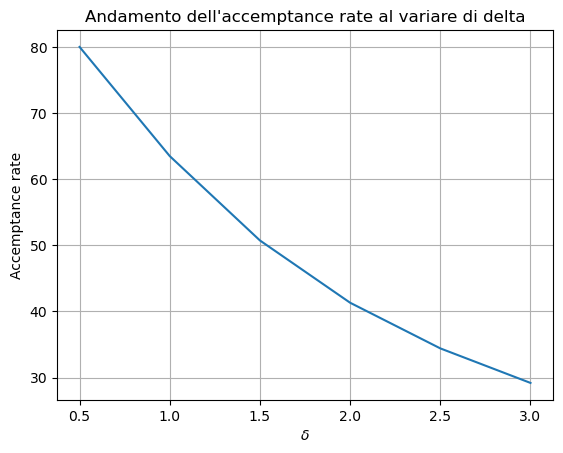

In [15]:
delta = [0.5, 1, 1.5, 2, 2.5, 3]
accpt = [79.98, 63.48, 50.73, 41.32, 34.42, 29.20]
plt.plot(delta, accpt)
plt.grid()
plt.xlabel("$\delta$")
plt.ylabel("Accemptance rate")
plt.title("Andamento dell'accemptance rate al variare di delta")
plt.show()

E' possibile notare come, con l'aumentare del delta e della percentuale delle mosse accettate, l'accemptance rate tende a diminuire all'aumentare del delta ed è più evidente per $\delta = 2.5$ e $\delta = 3$ mentre per $\delta = 0.5$ è possibile vedere come l'acceptance rate sia maggiore e ciò deriva dalla somiglianza dei moduli quadri in quelle posizioni perché lo spazio esplorato dagli elettroni risulta minimo. Per $\delta$ intorno al valore 1, quindi $\delta = 1$ e $\delta=1.5$ abbiamo una percentuale di mosse accettate compreso tra il 50% e il 60% consentendoci di usare un valore di $\delta$ vicino a 1.5.

#### Caso Elettroni non interagenti

In [13]:
#CASO ELETTRONI NON INTERAGENTI
He = VMC_He()
#Impongo il parametro Z come indicato nella task e
#seleziono il potenziale adeguato per il mio sistema (in
#questo caso seleziono il potenziale per sistema non interagente)
#successivamente genero numeri casuali e inizializzo le coordinate
#in un intervallo [-50, 50]
zeta = 2
He.SetParams([zeta, 0])
N = 100
passo = 1
rg = np.random.default_rng()
R = np.zeros((2,3),float)
rate = np.zeros(N)

#Creo dei file .txt dove salvare le coordinate dei due elettroni 
#e le energie locali trovate e calcolate
local_energy = open ('./TaskA/A_non_inter/local_energy.txt','wb')
r1 = open ('./TaskA/A_non_inter/pos_r1.txt','wb')
r2 = open ('./TaskA/A_non_inter/pos_r2.txt','wb')

#Generazione delle coordinate all'interno dell'intervallo
#che abbiamo imposto e mi salvo i risultati ottenuti sui file appena aperti
for i in range(N): 
    R[0,:] = np.array(rg.uniform(-50,50,3))
    R[1,:] = np.array(rg.uniform(-50,50,3))
    He.SetCoords(R)
    
    EnergyList,CoordsList_r1,CoordsList_r2,accpt=He.VMC(100000,delta = 1.618034)

    np.save(local_energy, EnergyList[::passo])
    np.save(r1, CoordsList_r1[::passo,:])
    np.save(r2, CoordsList_r2[::passo,:])
    rate[i] = accpt*100
#Mi calcolo l'accemptance rate e la varianza per poi concludere chiudendo
#i file sugli elettroni e sull'energia locale
acceptance_rate = np.mean(rate)
var = np.var(rate)
local_energy.close()
r1.close()
r2.close()
print('Z= %7.4f , Acceptance Rate= %6.2f  , Varianza= %10.6f' % (zeta,acceptance_rate,var))

Z=  2.0000 , Acceptance Rate=  42.73  , Varianza=   0.041881


In [16]:
#Carico i dai dati e leggo i risultati: calcolo l'energia e lo
#confronto col valore analitico
energy = np.load("./TaskA/A_non_inter/local_energy.txt")
r1 = np.load("./TaskA/A_non_inter/pos_r1.txt")
r2 = np.load("./TaskA/A_non_inter/pos_r2.txt")
#std = np.std(energy)
print("Energia media = %5.4f"%(energy.mean()))
print("Valore di riferimento analitico = -4.00")
#print("Deviazione standard = %3.2f"%(std))

Energia media = -4.0000
Valore di riferimento analitico = -4.00


#### Caso Elettroni interagenti

In [14]:
#CASO ELETTRONI INTERAGENTI
He = VMC_He()
#Impongo le condizini, come indicato nella task, su Z e
#seleziono il potenziale adeguato per il mio sistema (in
#questo caso seleziono il potenziale per sistema interagente)
#successivamente genero numeri casuali e inizializzo le coordinate
#in un intervallo [-50, 50] da permetterci di avere
#una percentuale di casi accettati del circa 50%
zeta = 27/16
He.SetParams([zeta,1])
N = 100
passo = 1
R = np.zeros((2,3),float)
rate = np.zeros(N)
gen = np.random.default_rng()

local_energy = open ('./TaskA/A_inter/local_energy.txt','wb')
r1 = open ('./TaskA/A_inter/pos_r1.txt','wb')
r2 = open ('./TaskA/A_inter/pos_r2.txt','wb')

for i in range(N):
    R[0,:] = np.array(gen.uniform(-50,50,3))
    R[1,:] = np.array(gen.uniform(-50,50,3))
    He.SetCoords(R)
    
    EnergyList,CoordsList_r1,CoordsList_r2,accpt=He.VMC(100000,delta = 1.618034)

    np.save(local_energy, EnergyList[::passo])
    np.save(r1, CoordsList_r1[::passo,:])
    np.save(r2, CoordsList_r2[::passo,:])
    rate[i] = accpt*100
acceptance_rate = np.mean(rate)
var = np.var(rate)
local_energy.close()
r1.close()
r2.close()
print('Z= %7.4f , Acceptance Rate= %6.2f , varianza= %10.6f' % (zeta,acceptance_rate,var))

Z=  1.6875 , Acceptance Rate=  48.24 , varianza=   0.045467


In [17]:
energy = np.load("./TaskA/A_inter/local_energy.txt")
r1 = np.load("./TaskA/A_inter/pos_r1.txt")
r2 = np.load("./TaskA/A_inter/pos_r2.txt")
print("Energia media = %5.4f"%(energy.mean()))
print("Valore di riferimento analitico = -2.8477")

Energia media = -2.8630
Valore di riferimento analitico = -2.8477


Seguono, adesso, grafici dell'andamento dell'energia locale e il suo istogramma e uno scatter plot per visualizzare la densità di probabilità nelle due dimensioni ($r_1, r_2$)

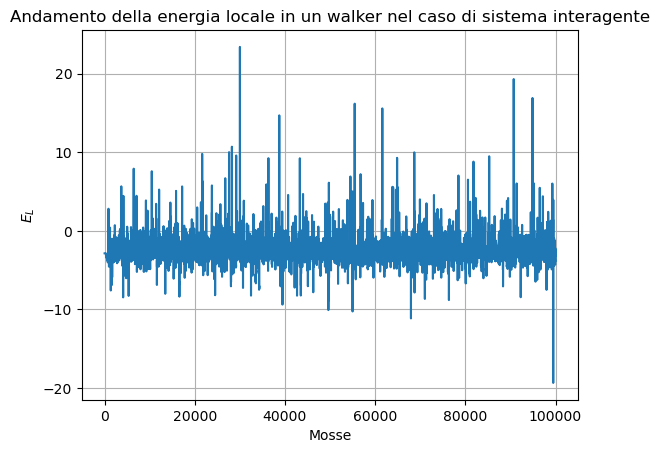

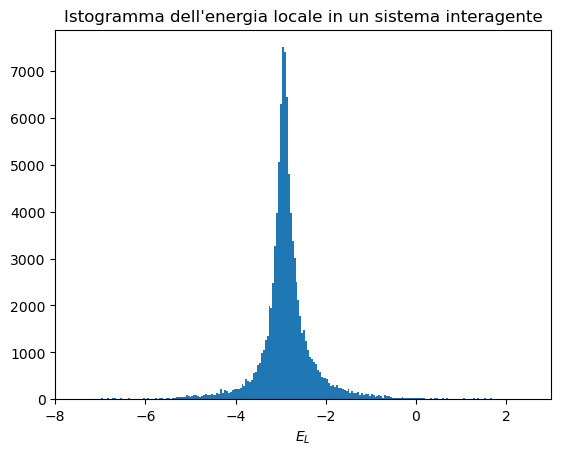

In [20]:
with open('./TaskA/A_inter/local_energy.txt', 'rb') as file:
    coeff = np.load(file)
    energyList = np.load(file)
plt.plot(energyList)
plt.title("Andamento della energia locale in un walker nel caso di sistema interagente")
plt.grid ()
plt.xlabel("Mosse")
plt.ylabel("$E_L$")
plt.show()
#
plt.hist(energyList,bins=1000)
plt.title("Istogramma dell'energia locale in un sistema interagente")
plt.xlabel("$E_L$")
plt.xlim (-8, 3)
plt.show()

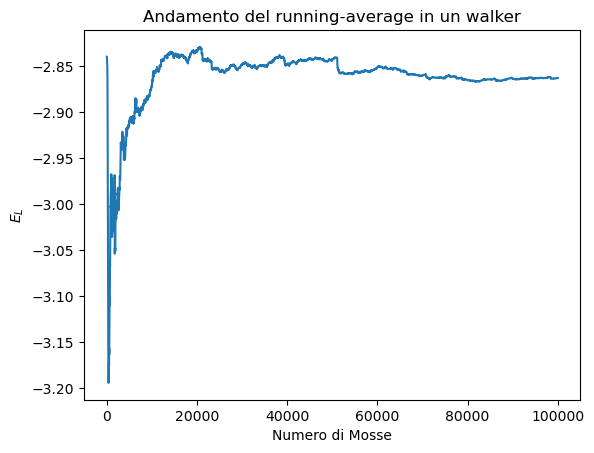

In [22]:
passo = 1
with open('./TaskA/A_inter/local_energy.txt', 'rb') as file:
    energyList = np.load(file)
    M = len(energyList)
run_avg=np.zeros(M)
mosse = np.arange(0,M*passo,1*passo)
for t in range(M):
    run_avg[t]=np.mean(energyList[:t])
plt.plot(mosse,run_avg)
plt.xlabel("Numero di Mosse")
plt.ylabel("$E_L$")
plt.title("Andamento del running-average in un walker")
plt.show()

## Scatter Plot

[]

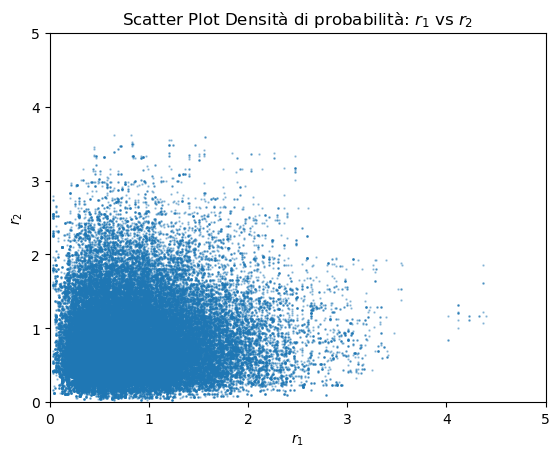

In [23]:
with open('./TaskA/A_inter/pos_r1.txt', 'rb') as file:
    r1_vector = np.load(file)
    r1 = np.linalg.norm(r1_vector[1000:],axis=1)
with open('./TaskA/A_inter/pos_r2.txt', 'rb') as file:
    r2_vector = np.load(file)
    r2 = np.linalg.norm(r2_vector[1000:],axis=1)
plt.scatter(r1,r2, s=0.5, alpha=0.4)
plt.xlabel("$r_1$")
plt.ylabel("$r_2$")
plt.xlim(0,5)
plt.ylim(0,5)
plt.title("Scatter Plot Densità di probabilità: $r_1$ vs $r_2$")
plt.plot()

## Task B.

In [12]:
class He_VMC_B:
    def __init__(self):
        self.coords = np.zeros((2,3))
        self.rg = np.random.default_rng()
        
    def SetParams(self,params):
        self.params=params.copy()
        
    def SetCoords(self,coords):
        self.coords=coords.copy()
        
    def WaveFunction(self,coords):
        alpha=self.params[0]
        r1 = np.linalg.norm(coords[0,:])
        r2 = np.linalg.norm(coords[1,:])
        r12 = np.linalg.norm(coords[0,:]-coords[1,:])
        return np.exp(-2.*(r1+r2)+(0.5*r12)/(1+alpha*r12))

        
    def LocalEnergy(self,coords):
        KE = -0.5*self.LaplacianPsiOverPsi(coords)
        V  = self.Potential(coords)
        return V+KE
    
    def Potential(self,coords):
        #Utilizzo solo il potenziale per il sistema con elettroni interagenti
        #e non ho più bisogno di segliere tra i due sistemi
        r1 = np.linalg.norm(coords[0,:])
        r2 = np.linalg.norm(coords[1,:])
        r12 = np.linalg.norm(coords[0,:]-coords[1,:])
        return (-2*r12*(r1 + r2) + r1*r2)/(r1*r2*r12)
    
    def LaplacianPsiOverPsi(self,coords,delta=0.0001):
        total=0.0
        tempVal3=self.WaveFunction(coords)
        for i in range(0,len(coords)):
            for j in range(0,len(coords[0])):
                coords[i,j]=coords[i,j]+delta
                tempVal=self.WaveFunction(coords)
                coords[i,j]=coords[i,j]-2*delta
                tempVal2=self.WaveFunction(coords)
                coords[i,j]=coords[i,j]+delta
                total +=(tempVal+tempVal2)-2.0*tempVal3
        return total/(delta*delta*tempVal3)
    
    def VMC(self,numSteps=1000,delta=1.618034):
        EnergyList=np.zeros(numSteps)
        CoordsList_r1=np.zeros((numSteps,3))
        CoordsList_r2=np.zeros((numSteps,3))
        movesAttempted=0.0
        movesAccepted=0.0
        Psi=self.WaveFunction(self.coords)
        energy=self.LocalEnergy(self.coords)
        for step in range(numSteps):
            nu1 = np.random.randint(2)
            nu2 = np.random.randint(3)
            RT = self.coords.copy()
            RT[nu1,nu2] = self.coords[nu1,nu2] + self.rg.uniform(-delta,delta,1)
            newPsi=self.WaveFunction(RT)
            if ( newPsi**2/Psi**2 > self.rg.random() ):
                self.coords=RT.copy()
                Psi=newPsi
                movesAccepted+=1.
                energy=self.LocalEnergy(self.coords)
            movesAttempted+=1.
            EnergyList[step] = energy
            CoordsList_r1[step,:] = self.coords[0,:]
            CoordsList_r2[step,:] = self.coords[1,:]            
        return EnergyList,CoordsList_r1,CoordsList_r2,movesAccepted/movesAttempted

    #Rispetto alla classe precedente abbiamo aggiunto la parte di ottimizzazione
    #da usare come assieme al VMC sopra. Essa consiste in un'interpolazione su griglia uniforme
    #che ci permette di determinare l'andamento di una variabile, nel nostro caso beta, secondo una griglia
    #di punti equamente spaziati partendo da valori discreti.
    def Griglia(self,start,stop,step,M,N,delta,passo=1):
        #Inizializzo le posizioni dei due elettroni nelle tre coordinate come dei numeri random
        R=np.zeros((2,3),float)
        n = int(0)
        #Ciclo for che ci permette di selezionare delle beta da un valore iniziale a un valore finale
        #con un certo step; per il caso in esame si è scelto di utilizzare delle beta comprese tra 0 e 1
        #in quanto sono molto più favorevoli delle configurazioni con gli elettroni lontani tra di loro
        for beta in np.arange(start,stop,step):
            n = n + 1
            self.SetParams([beta])
            #Creo dei file .txt dove salvare le coordinate e le energie locali trovate e calcolate
            error = open ('./Analisi_Errore/delta_0.5'+str(n)+'.txt','wb')
            energy = open('./TaskB/local_energy'+str(n)+'.txt','wb')
            r1 = open('./TaskB/r1'+str(n)+'.txt','wb')
            r2 = open('./TaskB/r2'+str(n)+'.txt','wb')
            np.save(delta, energy, beta)
            np.save(energy,beta)
            np.save(r1,beta)
            np.save(r2,beta)
            rate = np.zeros(N)
            for i in range(N):
                ##Generazione delle coordinate all'interno dell'intervallo
                #che abbiamo imposto
                R[0,:] = np.array(np.random.uniform(-50,50,3))
                R[1,:] = np.array(np.random.uniform(-50,50,3))
                self.SetCoords(R)
                #richiamo l'algoritmo metropolis e mi salvo i risultati nei file aperti
                energyList,coordsList_r1,coordsList_r2,accpt=self.VMC(100000,delta)
                np.save(energy,energyList[::passo])
                np.save(r1,coordsList_r1[::passo,:])
                np.save(r2,coordsList_r2[::passo,:])
                rate[i] = accpt*100
            #Mi calcolo l'accemptance rate e la varianza per poi concludere chiudendo
            #i file
            rate_m = np.mean(rate)
            rate_var = np.var(rate)
            energy.close()
            r1.close()
            r2.close()
            print('beta= %7.4f , accpt= %6.2f , var= %10.6f' % (beta,rate_m,rate_var))

In [317]:
He2=He_VMC_B()
#Definisco l'intervallo di lavoro, in particolare ho scelto
#di partire da 0.05 e arrivare a 0.5 con step di 0.005
#la scelta di questo intervallo è dovuto al grosso costo computazionale
#delle operazioni effettuate e sapendo che il parametro beta
#più è basso più il sistema si trova energicamente più favorevole
start=0.05
stop=0.5
step=0.005
delta=1.5
N = 10 #numero walker
He2.Griglia(start,stop,step,100000,N,delta)

beta=  0.0500 , accpt=  50.48 , var=   0.021707
beta=  0.0550 , accpt=  50.45 , var=   0.062966
beta=  0.0600 , accpt=  50.18 , var=   0.023328
beta=  0.0650 , accpt=  50.10 , var=   0.053866
beta=  0.0700 , accpt=  50.19 , var=   0.031119
beta=  0.0750 , accpt=  50.03 , var=   0.048154
beta=  0.0800 , accpt=  50.00 , var=   0.027127
beta=  0.0850 , accpt=  49.85 , var=   0.037361
beta=  0.0900 , accpt=  49.81 , var=   0.029477
beta=  0.0950 , accpt=  49.68 , var=   0.036349
beta=  0.1000 , accpt=  49.80 , var=   0.031818
beta=  0.1050 , accpt=  49.69 , var=   0.018242
beta=  0.1100 , accpt=  49.58 , var=   0.036472
beta=  0.1150 , accpt=  49.53 , var=   0.029293
beta=  0.1200 , accpt=  49.58 , var=   0.026474
beta=  0.1250 , accpt=  49.42 , var=   0.016697
beta=  0.1300 , accpt=  49.34 , var=   0.020779
beta=  0.1350 , accpt=  49.27 , var=   0.014009
beta=  0.1400 , accpt=  49.33 , var=   0.034509
beta=  0.1450 , accpt=  49.17 , var=   0.061625
beta=  0.1500 , accpt=  49.28 , var=   0

In [318]:
#Imposto l'intervallo e il numero dei walk
start=0.05
stop=0.5
step=0.005
N = 10
#trovo il numero dei beta e utilizzo il ciclo for per aprire il file
#relativo all'energia e utilizzo i valori trovati prima per calcolare l'energia
num_beta = int((stop-start)//step)
for i in range(1,num_beta+1):
    energy = np.zeros(N)
    with open('./TaskB/local_energy'+str(i)+'.txt', 'rb') as file:
        coeff = np.load(file)
        for j in range(N):
            energyList = np.load(file)
            energy[j] = np.mean(energyList[40000//passo:])
    result = np.mean(energy)
    std = np.std(energy) #calcolo la deviazione standard
    print('beta= %7.4f , energy= %10.6f , std= %10.6f' % (coeff,result,std))

beta=  0.0500 , energy=  -2.873591 , std=   0.004615
beta=  0.0550 , energy=  -2.872892 , std=   0.004499
beta=  0.0600 , energy=  -2.870443 , std=   0.005097
beta=  0.0650 , energy=  -2.873970 , std=   0.005339
beta=  0.0700 , energy=  -2.874396 , std=   0.003694
beta=  0.0750 , energy=  -2.877870 , std=   0.005240
beta=  0.0800 , energy=  -2.875036 , std=   0.005752
beta=  0.0850 , energy=  -2.877666 , std=   0.007082
beta=  0.0900 , energy=  -2.879705 , std=   0.006392
beta=  0.0950 , energy=  -2.875773 , std=   0.004637
beta=  0.1000 , energy=  -2.876906 , std=   0.006509
beta=  0.1050 , energy=  -2.877616 , std=   0.004717
beta=  0.1100 , energy=  -2.876282 , std=   0.003703
beta=  0.1150 , energy=  -2.878553 , std=   0.002744
beta=  0.1200 , energy=  -2.877136 , std=   0.004217
beta=  0.1250 , energy=  -2.878601 , std=   0.003350
beta=  0.1300 , energy=  -2.878518 , std=   0.005234
beta=  0.1350 , energy=  -2.877116 , std=   0.002064
beta=  0.1400 , energy=  -2.877425 , std=   0.

In [224]:
He2=He_VMC_B()
#Definisco l'intervallo di lavoro, in particolare ho scelto
#di partire da 0.5 e arrivare a 1 con step di 0.005
#per completare l'analisi dei beta
start=0.5
stop=1
step=0.005
delta=1.5
N = 10 #numero walker
He2.Griglia(start,stop,step,100000,N,delta)

beta=  0.5000 , accpt=  47.26 , var=   0.020064
beta=  0.5050 , accpt=  47.48 , var=   0.053418
beta=  0.5100 , accpt=  47.33 , var=   0.026128
beta=  0.5150 , accpt=  47.40 , var=   0.039049
beta=  0.5200 , accpt=  47.34 , var=   0.051952
beta=  0.5250 , accpt=  47.35 , var=   0.075182
beta=  0.5300 , accpt=  47.17 , var=   0.013344
beta=  0.5350 , accpt=  47.13 , var=   0.032757
beta=  0.5400 , accpt=  47.21 , var=   0.040954
beta=  0.5450 , accpt=  47.19 , var=   0.043070
beta=  0.5500 , accpt=  47.26 , var=   0.071399
beta=  0.5550 , accpt=  47.10 , var=   0.061321
beta=  0.5600 , accpt=  47.23 , var=   0.028441
beta=  0.5650 , accpt=  47.21 , var=   0.039759
beta=  0.5700 , accpt=  47.08 , var=   0.024532
beta=  0.5750 , accpt=  47.22 , var=   0.023765
beta=  0.5800 , accpt=  47.12 , var=   0.028903
beta=  0.5850 , accpt=  47.06 , var=   0.066502
beta=  0.5900 , accpt=  47.05 , var=   0.018948
beta=  0.5950 , accpt=  47.30 , var=   0.056835
beta=  0.6000 , accpt=  47.04 , var=   0

In [315]:
#Imposto l'intervallo e il numero dei walk
start=0.05
stop=0.5
step=0.005
N = 10
#trovo il numero dei beta e utilizzo il ciclo for per aprire il file
#relativo all'energia e utilizzo i valori trovati prima per calcolare l'energia
num_beta = int((stop-start)//step)
for i in range(1,num_beta+1):
    energy = np.zeros(N)
    with open('./TaskB/local_energy'+str(i)+'.txt', 'rb') as file:
        coeff = np.load(file)
        for j in range(N):
            energyList = np.load(file)
            energy[j] = np.mean(energyList[40000//passo:])
    result = np.mean(energy)
    std = np.std(energy) #calcolo la deviazione standard
    print('beta= %7.4f , energy= %10.6f , std= %10.6f' % (coeff,result,std))

beta=  0.5000 , energy=  -2.853399 , std=   0.006747
beta=  0.5050 , energy=  -2.855785 , std=   0.007686
beta=  0.5100 , energy=  -2.855647 , std=   0.007702
beta=  0.5150 , energy=  -2.857526 , std=   0.007462
beta=  0.5200 , energy=  -2.856457 , std=   0.006522
beta=  0.5250 , energy=  -2.854251 , std=   0.009846
beta=  0.5300 , energy=  -2.852071 , std=   0.007663
beta=  0.5350 , energy=  -2.851612 , std=   0.007578
beta=  0.5400 , energy=  -2.855360 , std=   0.006078
beta=  0.5450 , energy=  -2.851282 , std=   0.007208
beta=  0.5500 , energy=  -2.854665 , std=   0.008765
beta=  0.5550 , energy=  -2.849421 , std=   0.008777
beta=  0.5600 , energy=  -2.856035 , std=   0.006055
beta=  0.5650 , energy=  -2.855090 , std=   0.007768
beta=  0.5700 , energy=  -2.847521 , std=   0.007935
beta=  0.5750 , energy=  -2.854467 , std=   0.007930
beta=  0.5800 , energy=  -2.852881 , std=   0.005863
beta=  0.5850 , energy=  -2.850852 , std=   0.006394
beta=  0.5900 , energy=  -2.846539 , std=   0.

Il valore migliore di $\beta$ grazie alla quale l'energia è minore è $\beta = 0.15$ con energia $ \left\langle E_L \right\rangle = (-2.88077 \pm 0.004151)$.

## Grafici

Per comodità e leggibilità si è deciso di di visualizzare i grafici relativi ai file 1 e 51 delle energie {local_energy1.txt, local_energy51.txt} e visualizzarne gli andamanti, istogrammi e running average. Inoltre è possibile visualizzare gli scatter plot relativi alle densità di probabilità delle posizioni relative {r11.txt, r21.txt, r151.txt, r251.txt}.

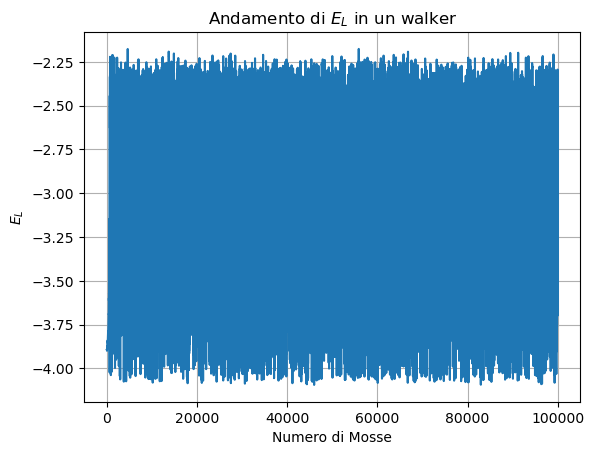

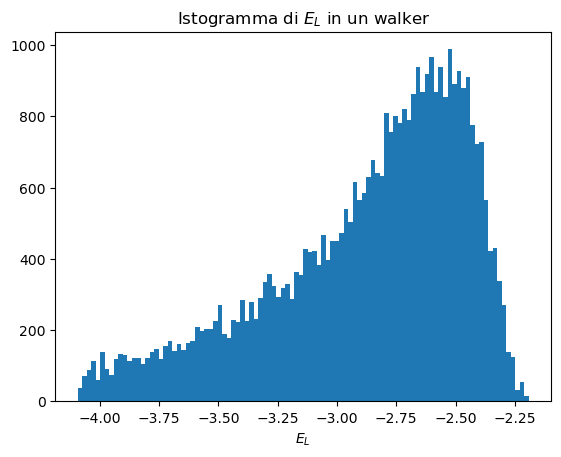

In [428]:
with open('./TaskB/local_energy1.txt', 'rb') as file:
    coeff = np.load(file)
    energyList = np.load(file)
plt.plot(mosse,energyList)
plt.grid()
plt.xlabel("Numero di Mosse")
plt.ylabel("$E_L$")
plt.title("Andamento di $E_L$ in un walker")
plt.show()

#istogramma
plt.hist(energyList[60000//passo:],bins=100)
plt.title("Istogramma di $E_L$ in un walker")
plt.xlabel("$E_L$")
plt.show()

[]

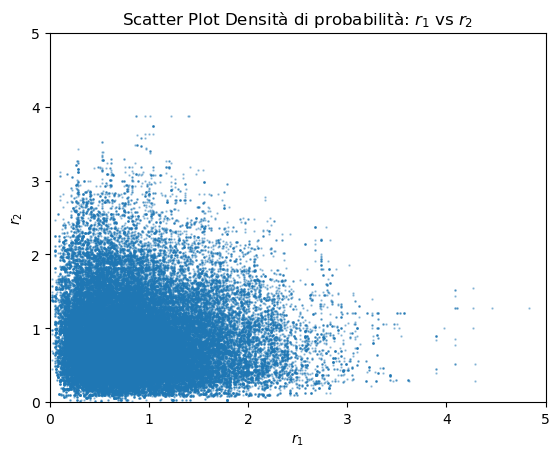

In [337]:
with open('./TaskB/r11.txt', 'rb') as file:
    coeff = np.load(file)
    r1_vector = np.load(file)
    r1 = np.linalg.norm(r1_vector[1000:],axis=1)
with open('./TaskB/r21.txt', 'rb') as file:
    coeff = np.load(file)
    r2_vector = np.load(file)
    r2 = np.linalg.norm(r2_vector[1000:],axis=1)
plt.scatter(r1,r2, s=0.5, alpha=0.4)
plt.xlabel("$r_1$")
plt.ylabel("$r_2$")
plt.xlim(0,5)
plt.ylim(0,5)
plt.title("Scatter Plot Densità di probabilità: $r_1$ vs $r_2$")
plt.plot()

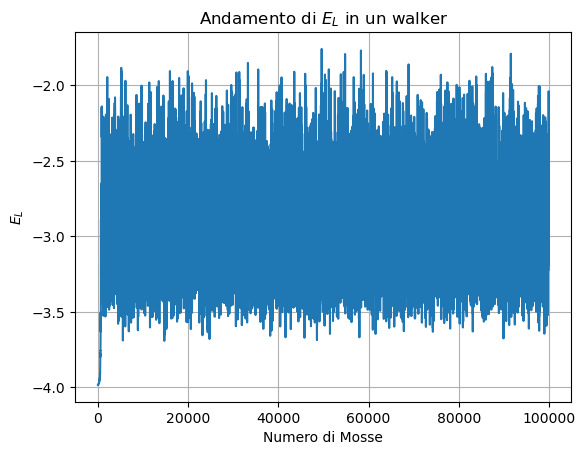

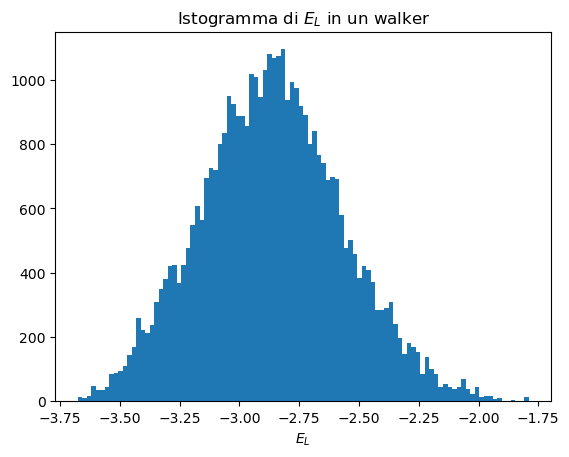

In [429]:
with open('./TaskB/local_energy51.txt', 'rb') as file:
    coeff = np.load(file)
    energyList = np.load(file)
plt.plot(mosse,energyList)
plt.grid()
plt.xlabel("Numero di Mosse")
plt.ylabel("$E_L$")
plt.title("Andamento di $E_L$ in un walker")
plt.show()

#istogramma
plt.hist(energyList[60000//passo:],bins=100)
plt.title("Istogramma di $E_L$ in un walker")
plt.xlabel("$E_L$")
plt.show()

[]

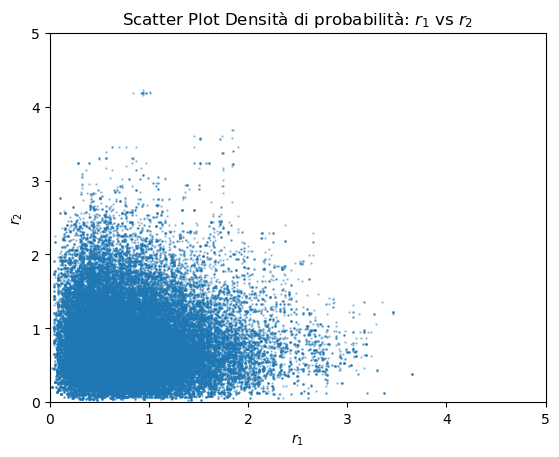

In [338]:
with open('./TaskB/r151.txt', 'rb') as file:
    coeff = np.load(file)
    r1_vector = np.load(file)
    r1 = np.linalg.norm(r1_vector[1000:],axis=1)
with open('./TaskB/r251.txt', 'rb') as file:
    coeff = np.load(file)
    r2_vector = np.load(file)
    r2 = np.linalg.norm(r2_vector[1000:],axis=1)
plt.scatter(r1,r2, s=0.5, alpha=0.4)
plt.xlabel("$r_1$")
plt.ylabel("$r_2$")
plt.xlim(0,5)
plt.ylim(0,5)
plt.title("Scatter Plot Densità di probabilità: $r_1$ vs $r_2$")
plt.plot()

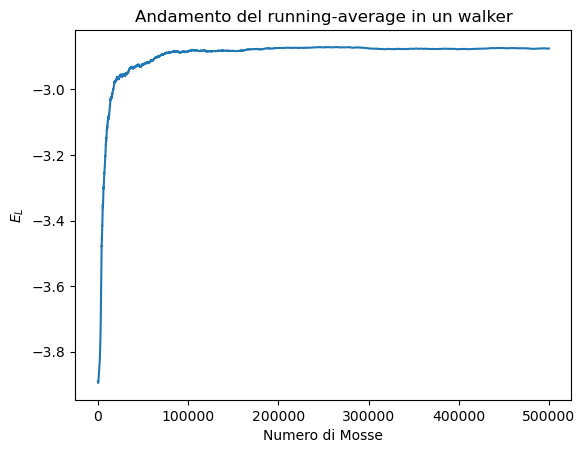

In [87]:
passo = 5
with open('./TaskB/local_energy1.txt', 'rb') as file:
    coeff = np.load(file)
    energyList = np.load(file)
    M = len(energyList)
run_avg=np.zeros(M)
mosse = np.arange(0,M*passo,1*passo)
for t in range(M):
    run_avg[t]=np.mean(energyList[:t])
plt.plot(mosse,run_avg)
plt.xlabel("Numero di Mosse")
plt.ylabel("$E_L$")
plt.title("Andamento del running-average in un walker")
plt.show()

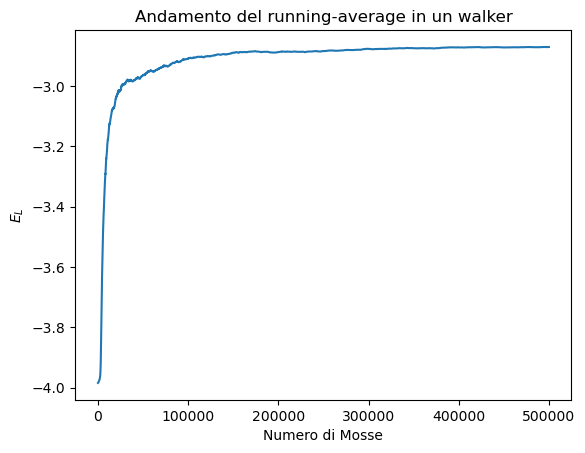

In [88]:
passo = 5
with open('./TaskB/local_energy51.txt', 'rb') as file:
    coeff = np.load(file)
    energyList = np.load(file)
    M = len(energyList)
run_avg=np.zeros(M)
mosse = np.arange(0,M*passo,1*passo)
for t in range(M):
    run_avg[t]=np.mean(energyList[:t])
plt.plot(mosse,run_avg)
plt.xlabel("Numero di Mosse")
plt.ylabel("$E_L$")
plt.title("Andamento del running-average in un walker")
plt.show()

### Conclusioni

E' possibile notare come, in entrambe le task, l'energia trovata non corrisponde completamente al valore misurato analiticamente pari a -2.904 anche se, per quanto riguarda il task B, grazie all'ottimizzazione utilizzata (interpolazione su griglia uniforme) ci si avvicina molto trovando un'energia pari a -2.880 e questo rispecchia i risultati attesi in quanto ci si aspettava un valore meno preciso dalla TaskA (abbiamo ottenuto infatti -2.863) dato che la funzione era relativa ad un sistema di elettroni non interagenti.

Grazie al confronto tra i grafici relativi alla running average dell'energia all'interno di un walker possiamo vedere come, nella prima Task, il numero di mosse per arrivare alla condizione stazionaria è di molto inferiore rispetto al quelle della seconda Task.

Per quanto riguarda il valore di $\beta$ atteso esso risulta ragionevole in quanto con $\beta$ piccoli il sistema è energicamente più favorevole, sono preferite delle configurazioni in cui i due elettroni sono distanti tra di loro.